# Jupyter Notebooks - Chemistry Demos

A range of packages exist for rendering molecules in 2D and 3D and embedding the result in an Jupyter notebook code cell output.

## `pybel`

The `pybel` package wraps [OpenBabel](http://openbabel.org/docs/current/index.html), an application that supports the reading and writing of chemical information.

`pybel` can be used to render a compound described using [SMILES](http://opensmiles.org/spec/open-smiles.html).

In [1]:
import pybel

For example, we can generate a SMILES string such as {{m="CC(C)C(=O)C(C)C"; print(m)}} and then display the associated molecular diagram: {{mol = pybel.readstring( "smi",m ); mol}}

*Double click this markdown cell to see how to define the string and render the diagram.*

We can also save the string as a `.sdf` file, with 3D co-ordinates included.

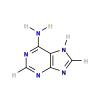

In [2]:
mol = pybel.readstring( "smi","C1=NC2=C(N1)C(=NC=N2)N" )

#Add hydrogens
mol.addh()

#Generate 3D co-ordinates
mol.make3D()
mol.write("sdf",'adenine.sdf')
mol

### `moldesign`

The `moldesign` [Molecular Design Toolkit](https://autodesk.github.io/molecular-design-toolkit/index.html) package provides a wide range of tools for working with and visualising chemical data.

In [3]:
import moldesign as mdt
from moldesign import units as u

- MDT expected nbmolviz version "0.7.0" but version "0.7.0rc9" is installed

You may be able to correct these issues by running this command on the command line:
    $ python -m nbmolviz activate

or by running the following python commands:
    >>> import nbmolviz.install
    >>> nbmolviz.install.autoinstall()
Afterwards, reload the notebook in your web browser.


`moldesign` can read in and render compunds saved as `.sdf` files:

In [4]:
mol=mdt.read("adenine.sdf")
mol.draw()

A Jupyter Widget

We can also create objects directly from a SMILES string and report back some basic information about the corresponding compound:

For example: {{x= mdt.from_smiles("CC(C)C(=O)C(C)C") ; x}}


*Double click the cell to see how this report was generated.*

We can also visualise the same compound:

In [5]:
x.draw()

A Jupyter Widget

Models can be retrieved from the RCSB Protein Data Bank (PDB) by referring to the appropriate model ID.

For example, we can retrieve a model from PDB and then render it:

In [6]:
protease = mdt.from_pdb('3AID')
protease.draw()

A Jupyter Widget

More examples via https://iwatobipen.wordpress.com/2017/07/30/quantum-chemistry-calculation-with-python/

## `pubchempy`

The [`pubchempy` package](https://github.com/mcs07/PubChemPy) [[docs](http://pubchempy.readthedocs.io/en/latest/)] provides an interface to [PubChem](https://pubchem.ncbi.nlm.nih.gov/) that allows users to lookup compound structures by name.

In [33]:
import pubchempy as pcp
ethanol = pcp.get_compounds('ethanol', 'name')[0]
ethanol.canonical_smiles

'CCO'

In [32]:
#Look up by SMILES string
compound = pcp.get_compounds('CCO', 'smiles')[0]
compound.iupac_name

'ethanol'

By chaining together various packages, we can look up things by name and then render them.

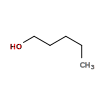

In [35]:
pentanol = pcp.get_compounds('pentanol', 'name')[0]
p = pybel.readstring( "smi", pentanol.canonical_smiles )
p

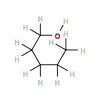

In [40]:
p.addh()
p

In [36]:
mdt.from_smiles(pentanol.canonical_smiles).draw()

A Jupyter Widget

## `pypdb`

`pydb` is a Python API for the [RCSB Protein Data Bank (PDB)](https://www.rcsb.org/pdb/home/home.do).

In [7]:
#https://github.com/williamgilpin/pypdb/blob/master/demos/demos.ipynb
from pypdb import *

search_dict = make_query('nitroglycerin')
found_pdbs = do_search(search_dict)
print(found_pdbs)

['4FQF', '4FR8']


## `rdkit`

The [`rdkit` python package](https://github.com/rdkit/rdkit) provides an API to the [RDKit Open-Source Cheminformatics Linux Package](http://www.rdkit.org/).

We can create objects from SMILES strings and save them as image files in a variety of formats.

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw

mol_str = 'COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C'

m = Chem.MolFromSmiles( mol_str )
Draw.MolToFile(m,'cdk2_mol1.o.png')
Draw.MolToFile(m,'cdk2_mol1.o.svg')

For example, the `.png` file:

![](cdk2_mol1.o.png)

And the `.svg` file:

![](cdk2_mol1.o.svg)

In [9]:
# displaying an SVG structure (in a Jupyter notebook) directly from the string
# The kekulize error is a known error
mol = Chem.MolFromSmiles( mol_str )
mol

In [10]:
Chem.MolToInchi(mol)

'InChI=1S/C17H19N3O3S/c1-10-8-18-15(11(2)16(10)23-4)9-24(21)17-19-13-6-5-12(22-3)7-14(13)20-17/h5-8H,9H2,1-4H3,(H,19,20)/t24-/m0/s1'

## `nglview`

[`nglview`](https://github.com/arose/nglview) is a package that supports the 3D visualisation of molecular structures and trajectories.

In [11]:
import nglview as nv

# load "3pqr" from RCSB PDB and display viewer widget
nv.show_pdbid("3pqr")  

A Jupyter Widget